In [22]:
from fastai import *
from fastai.vision import *
import numpy as np
import os

path = '/media/arrowhead/WD2/datasets'
path = Path(path)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train= 'train', valid_pct=0.2, num_workers=8, bs=256)
data

ImageDataBunch;

Train: LabelList (920126 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
8ASK,8ASK,8ASK,8ASK,8ASK
Path: /media/arrowhead/WD2/datasets;

Valid: LabelList (230031 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
4ASK,32APSK,64QAM,AM-DSB-SC,32QAM
Path: /media/arrowhead/WD2/datasets;

Test: None

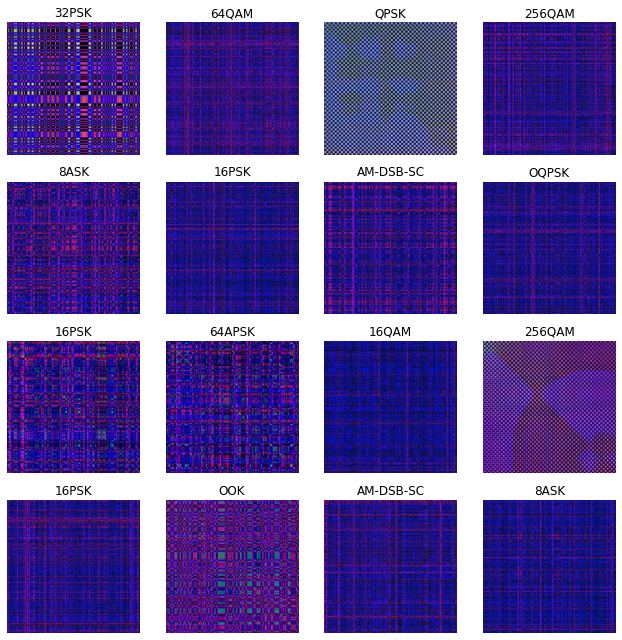

In [23]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy, error_rate])
data.show_batch(rows=4, figsize=(9,9))

In [14]:
import torch
print(torch.cuda.get_device_name(0))
torch.cuda.is_available()

GeForce RTX 2080 Ti


True

In [15]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.058720,2.012642,0.308898,0.691102,9:39:51
1,1.937827,1.888205,0.344013,0.655987,8:19:27
2,1.864972,1.841425,0.360421,0.639579,8:19:09
3,1.844056,1.812710,0.372858,0.627142,9:27:37
4,1.831829,1.804697,0.374956,0.625044,8:38:56
5,1.811690,1.791634,0.379719,0.620281,8:20:23
6,1.799157,1.784119,0.384082,0.615918,9:14:46
7,1.805656,1.779861,0.384948,0.615052,8:50:31
8,1.782476,1.775866,0.386659,0.613341,8:25:37
9,1.772146,1.776183,0.387530,0.612470,9:05:34


In [16]:
learn.save("model-1_10e")

In [17]:
learn.load('model-1_10e')

Learner(data=ImageDataBunch;

Train: LabelList (817889 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
8ASK,8ASK,8ASK,8ASK,8ASK
Path: /media/arrowhead/WD2/datasets;

Valid: LabelList (204472 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
256QAM,8PSK,16QAM,64APSK,32PSK
Path: /media/arrowhead/WD2/datasets;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

In [20]:
len(list(learn.model.parameters()))

68

In [24]:
learn.data.classes


['128APSK',
 '128QAM',
 '16APSK',
 '16PSK',
 '16QAM',
 '256QAM',
 '32APSK',
 '32PSK',
 '32QAM',
 '4ASK',
 '64APSK',
 '64QAM',
 '8ASK',
 '8PSK',
 'AM-DSB-SC',
 'AM-DSB-WC',
 'AM-SSB-SC',
 'AM-SSB-WC',
 'BPSK',
 'FM',
 'GMSK',
 'OOK',
 'OQPSK',
 'QPSK']

In [26]:
snrs = [0,    10,   12,   14,   16,   18,  2,    20,  24,  28,  -4,  -6,  -8,
-10,  -12,  -14,  -16,  -18,  -2,  -20,  22,  26,  30,  4,   6,   8]
list(snrs)

[0,
 10,
 12,
 14,
 16,
 18,
 2,
 20,
 24,
 28,
 -4,
 -6,
 -8,
 -10,
 -12,
 -14,
 -16,
 -18,
 -2,
 -20,
 22,
 26,
 30,
 4,
 6,
 8]

In [31]:
path = os.getcwd() + '/datasets'
path = Path(path)
test_data = ImageDataBunch.from_folder(path, bs=32, num_workers=8,valid='test/0').normalize(imagenet_stats)
loss, acc = learn.validate(test_data.valid_dl)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fdcaff5b9d0>
Traceback (most recent call last):
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/multiprocessing/popen_fork.py", line 47, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/multiprocessing/popen_fork.py", line 27, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 
/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packa

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/fastai/data_block.py", line 655, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/fastai/data_block.py", line 75, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0


In [30]:
from fastai import *
from fastai.vision import *
import numpy as np
import os

path = '/media/arrowhead/WD2/datasets/test/0'
# path_test_0 =  os.getcwd() + '/datasets/'
data = ImageDataBunch.from_folder(path, valid_pct=0.99, num_workers=8, bs=256)

You can deactivate this warning by passing `no_check=True`.
/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
OOK
  if getattr(ds, 'warn', False): warn(ds.warn)
/home/arrowhead/anaconda3/envs/playground/lib/python3.8/site-packages/fastai/basic_data.py:247: UserWarning: Your training dataloader is empty, you have only 50 items in your training set.
                 Your batch size is 256, you should lower it.
  warn(f"""Your training dataloader is empty, you have only {len(self.train_dl.dataset)} items in your training set.


In [31]:
# learn = cnn_learner(data, models.resnet18, metrics=[accuracy, error_rate])
learn.load('/media/arrowhead/WD2/datasets/models/model-1_10e')
print(' ')

In [19]:
data

ImageDataBunch;

Train: LabelList (50 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
OQPSK,AM-SSB-WC,AM-SSB-WC,AM-SSB-WC,QPSK
Path: /media/arrowhead/WD2/datasets/test/0;

Valid: LabelList (3937 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
8PSK,64QAM,FM,32QAM,FM
Path: /media/arrowhead/WD2/datasets/test/0;

Test: None

In [33]:
#SNR = 0
print(learn.validate(data.valid_dl))
# print("The accuracy is %d at SNR = %d "%(acc, 0))